In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pickle

from librep.transforms.fft import FFT
from librep.datasets.har.loaders import PandasMultiModalLoader
from librep.utils.dataset import PandasDatasetsIO
from librep.datasets.multimodal import PandasMultiModalDataset
from librep.datasets.multimodal.operations import DatasetWindowedTransform
from librep.datasets.multimodal.operations import (
    DatasetFitter,
    DatasetPredicter,
    DatasetWindowedTransform,
    DatasetY,
    DatasetEvaluator,
    DatasetTransformer,
)

from umap import UMAP

In [10]:
labels_activity = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down",
}

datasets = [
    "KuHar",
    "MotionSense",
    "UCI",
    "WISDM",
    "RealWorld",
]

In [11]:
def generate_chart(
        df, 
        title, 
        labels,
        hovertext: str = "activity"
    ):
    fig = go.Figure()
    for key, sub_def in df.groupby('type data'):
        fig.add_trace(
            go.Scatter (
                x=sub_def['x'],
                y=sub_def['y'],
                name=key,       # this sets its legend entry
                mode='markers',
                marker={'size': 4, 'color':'white'} if key == 'unbalanced' else {'size': 4},
                hovertext=sub_def["activity"]
                # "standard activity code"
                # color='gray',
            )
        )
    # fig.update_xaxes(range = [min_x,max_x])
    # fig.update_yaxes(range = [min_y,max_y])

    fig.update_layout (
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        hovermode='x',
        xaxis_title="X",
        yaxis_title="Y",
        legend_title="Set of data",
        template='plotly', 
        # template='ggplot2', 

        # You can see another thems on https://plotly.com/python/templates/        
        # Templates configuration
        # -----------------------
        #     Default template: 'plotly'
        #     Available templates:
        #         ['ggplot2', 'seaborn', 'simple_white', 'plotly',
        #          'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
        #          'ygridoff', 'gridon', 'none']

        width=1500,
        height=900,
        font=dict(
            size=15,
        )
    )

    fig.show("png")

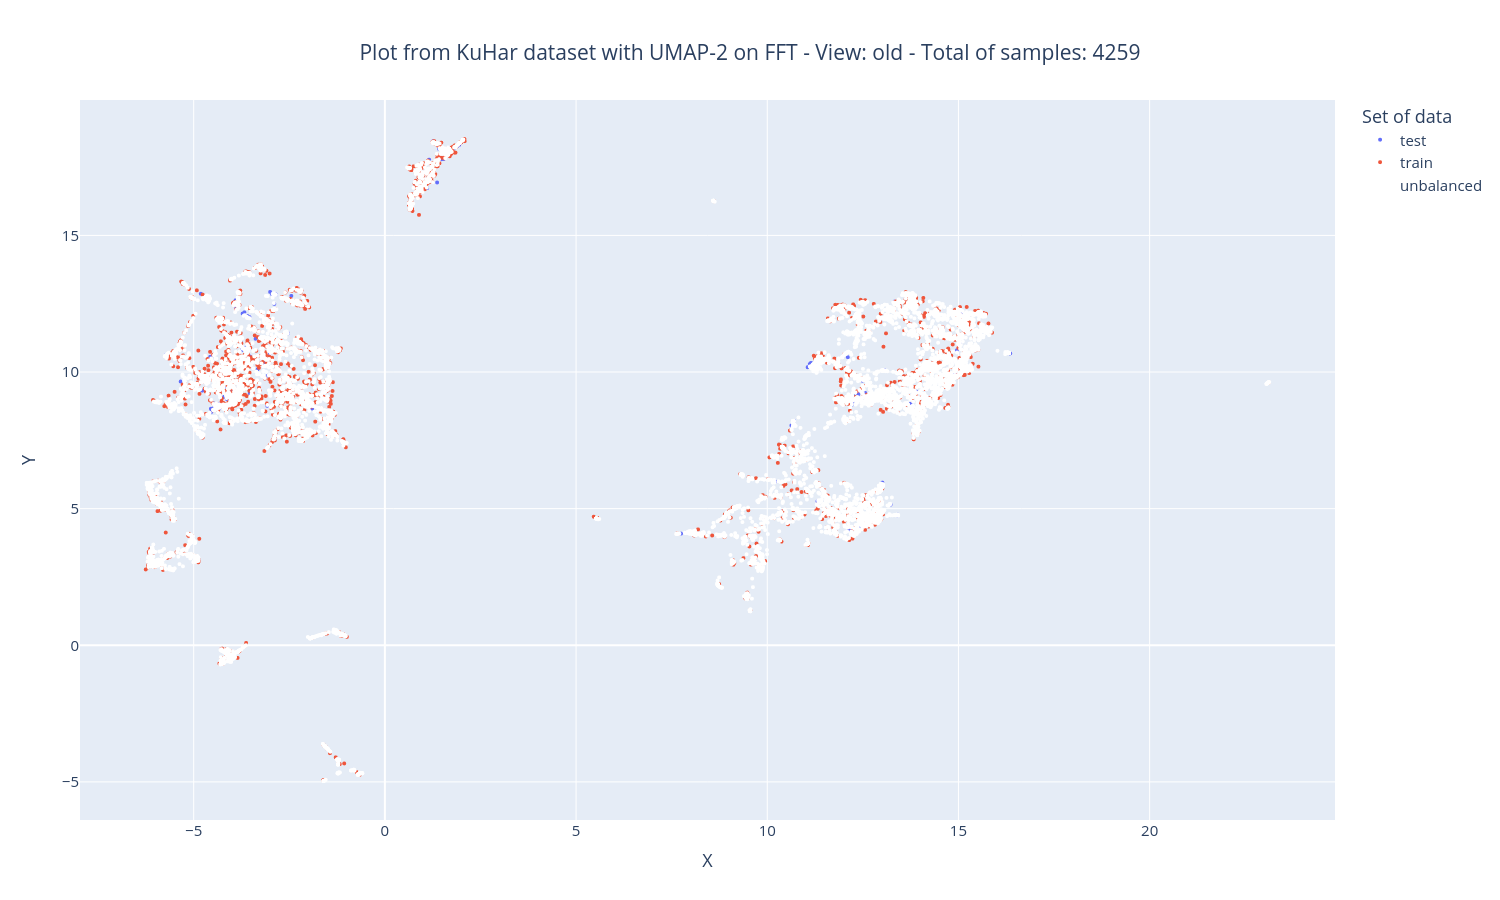

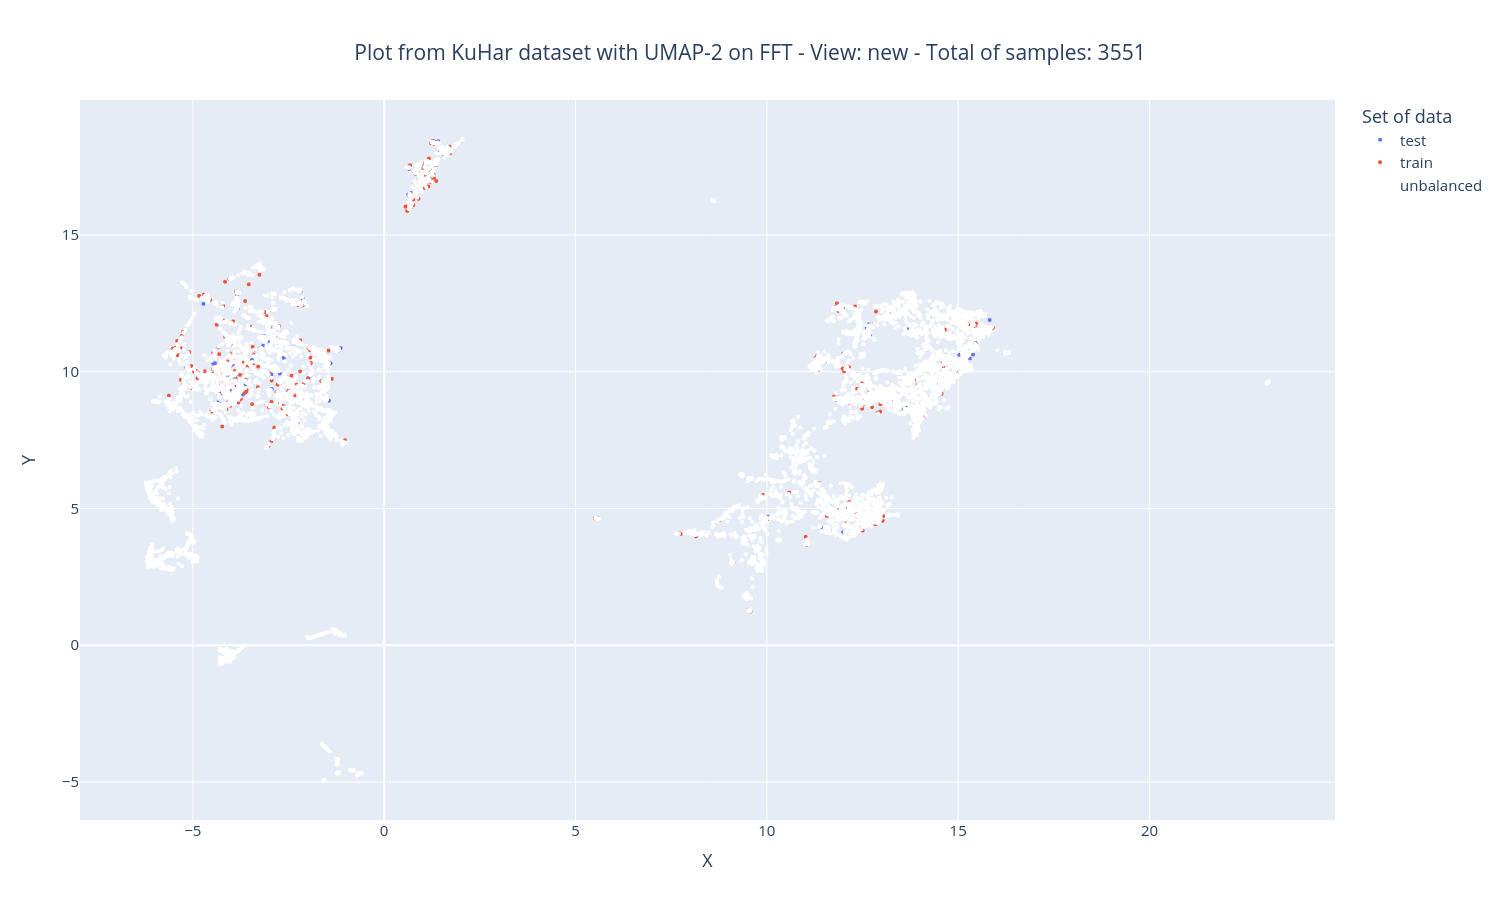

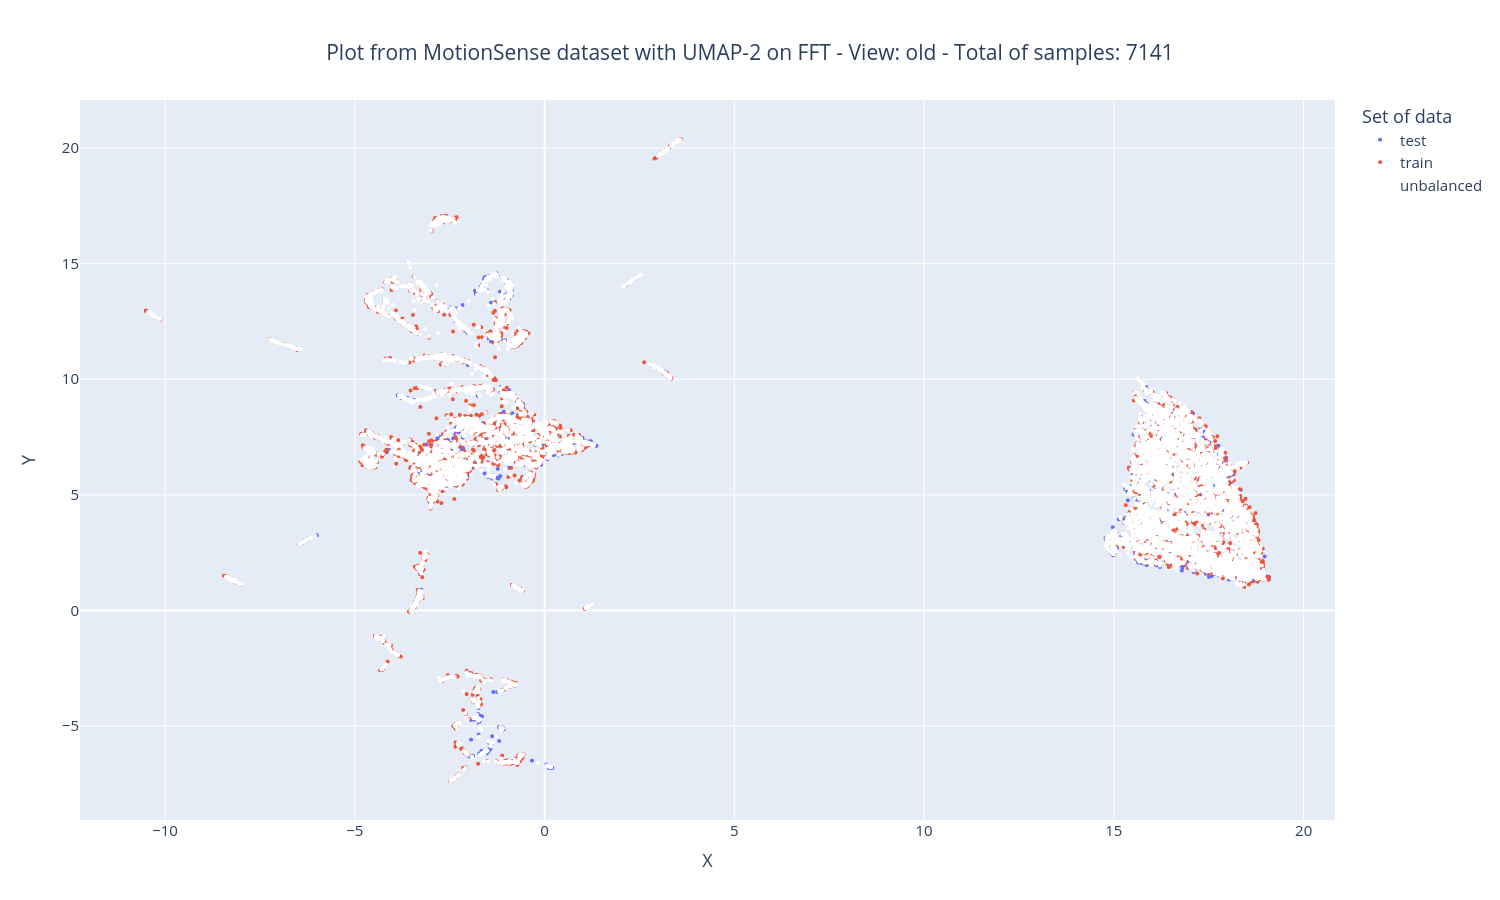

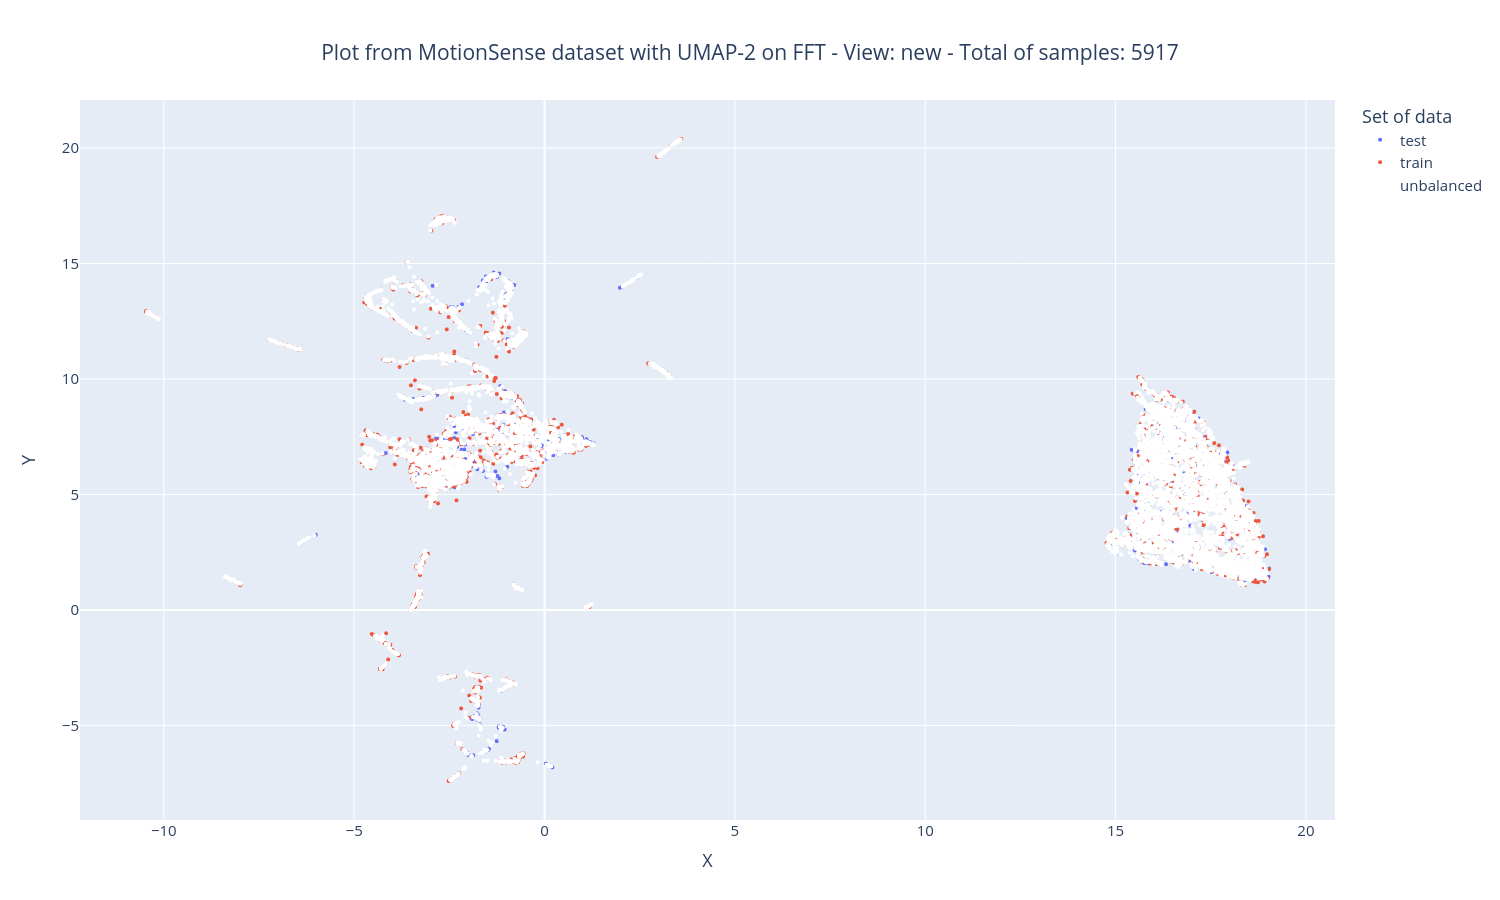

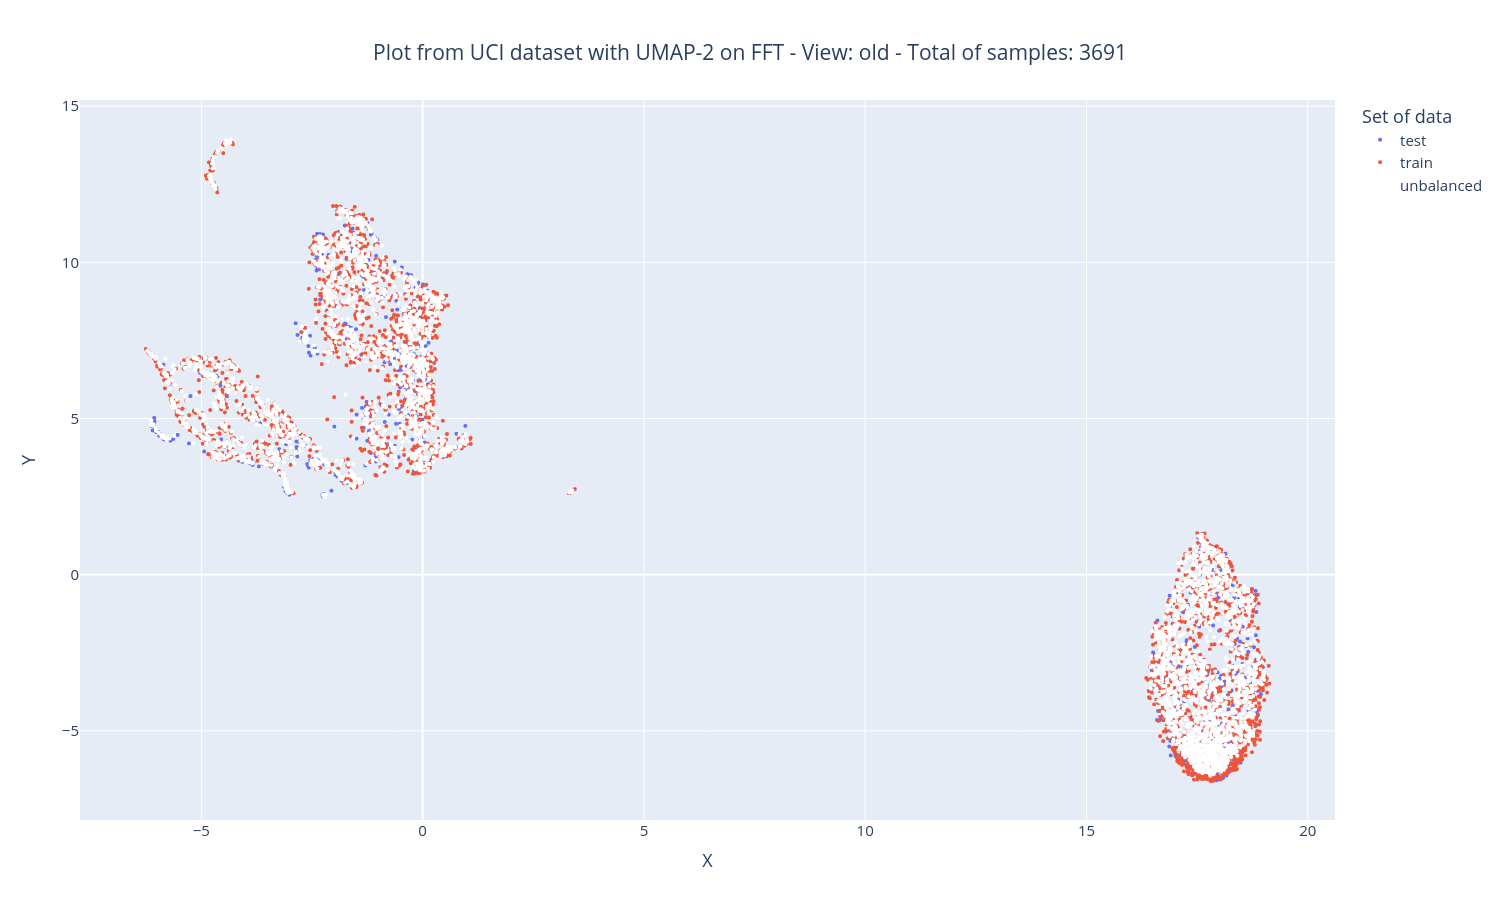

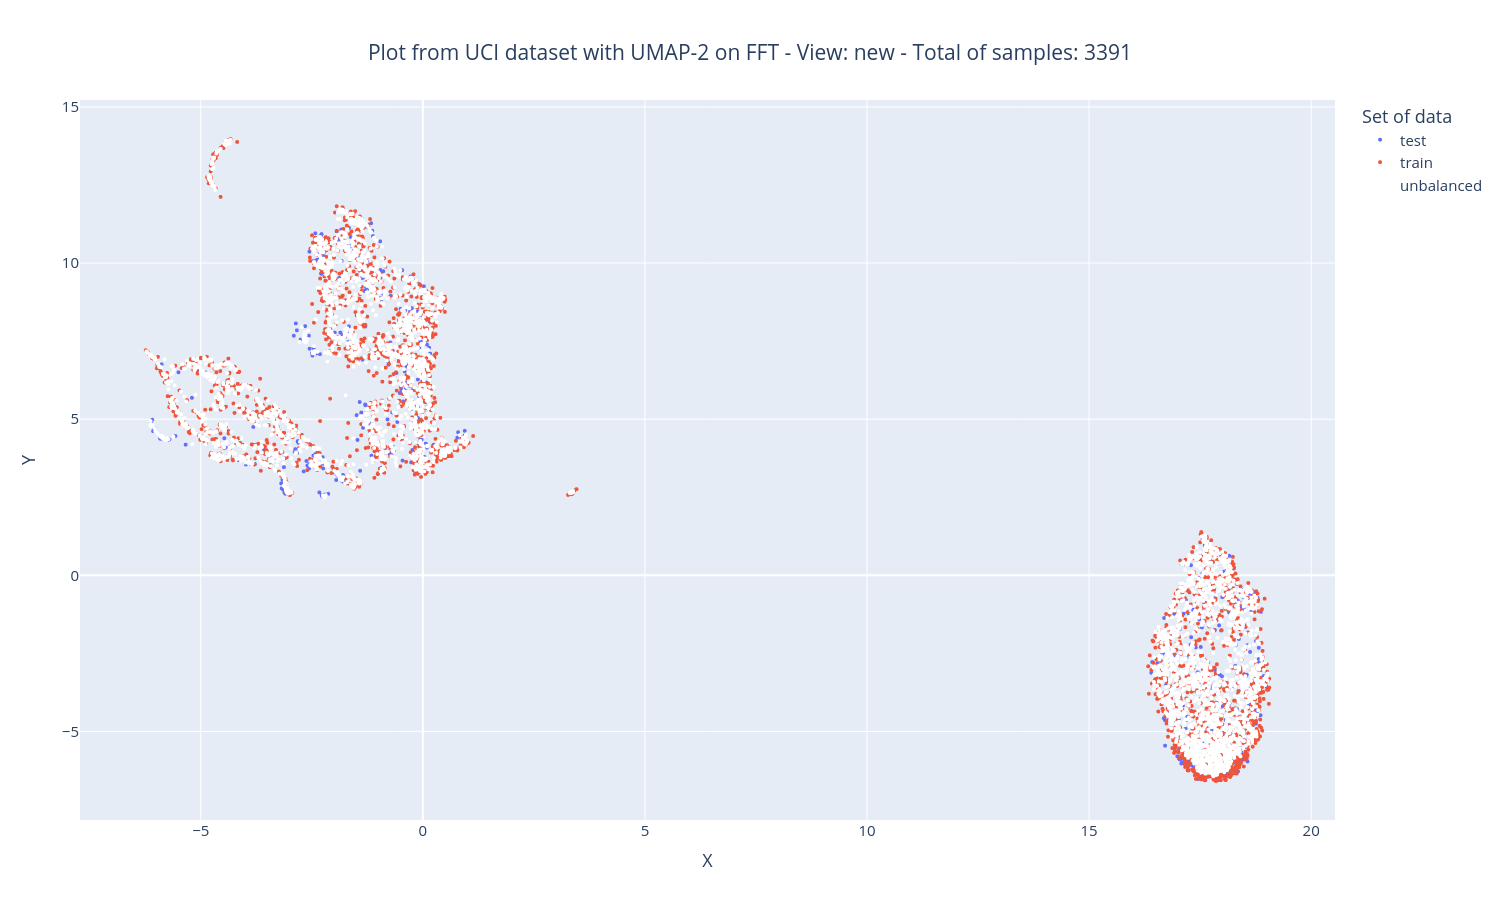

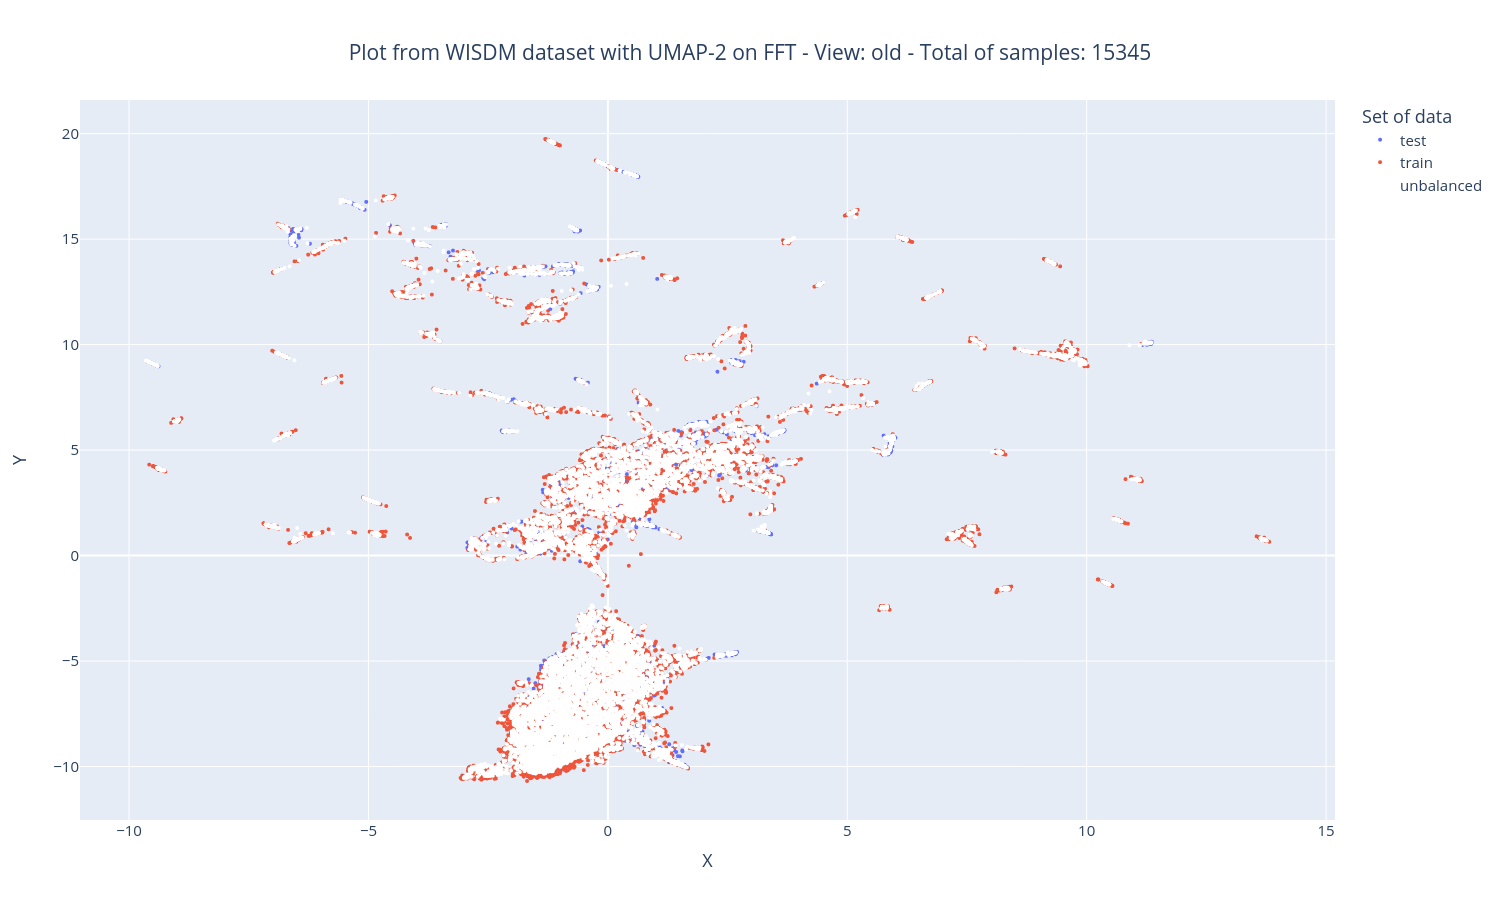

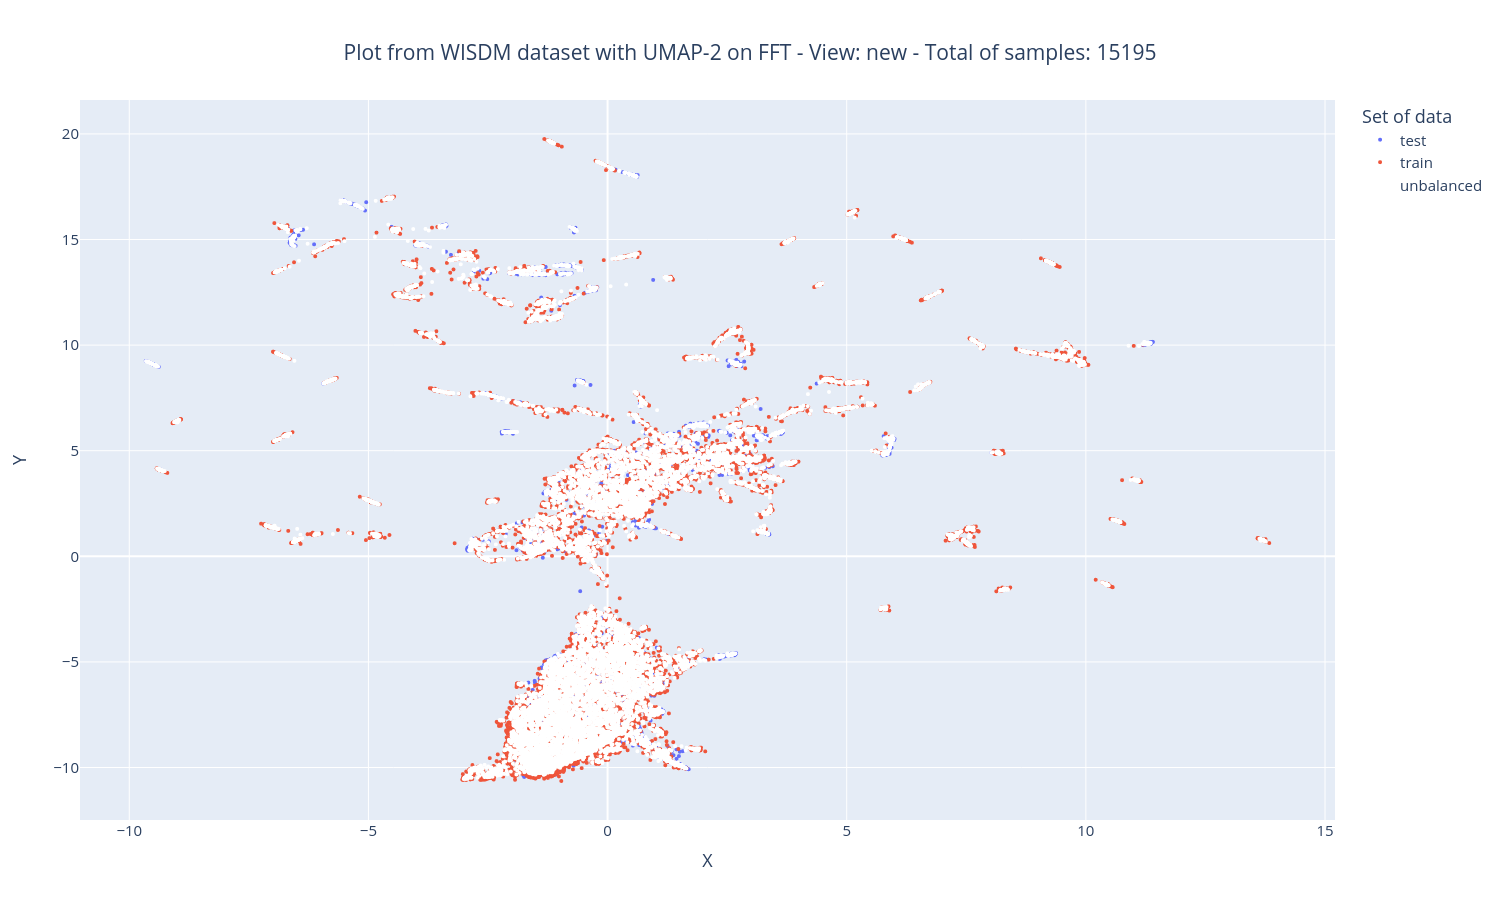

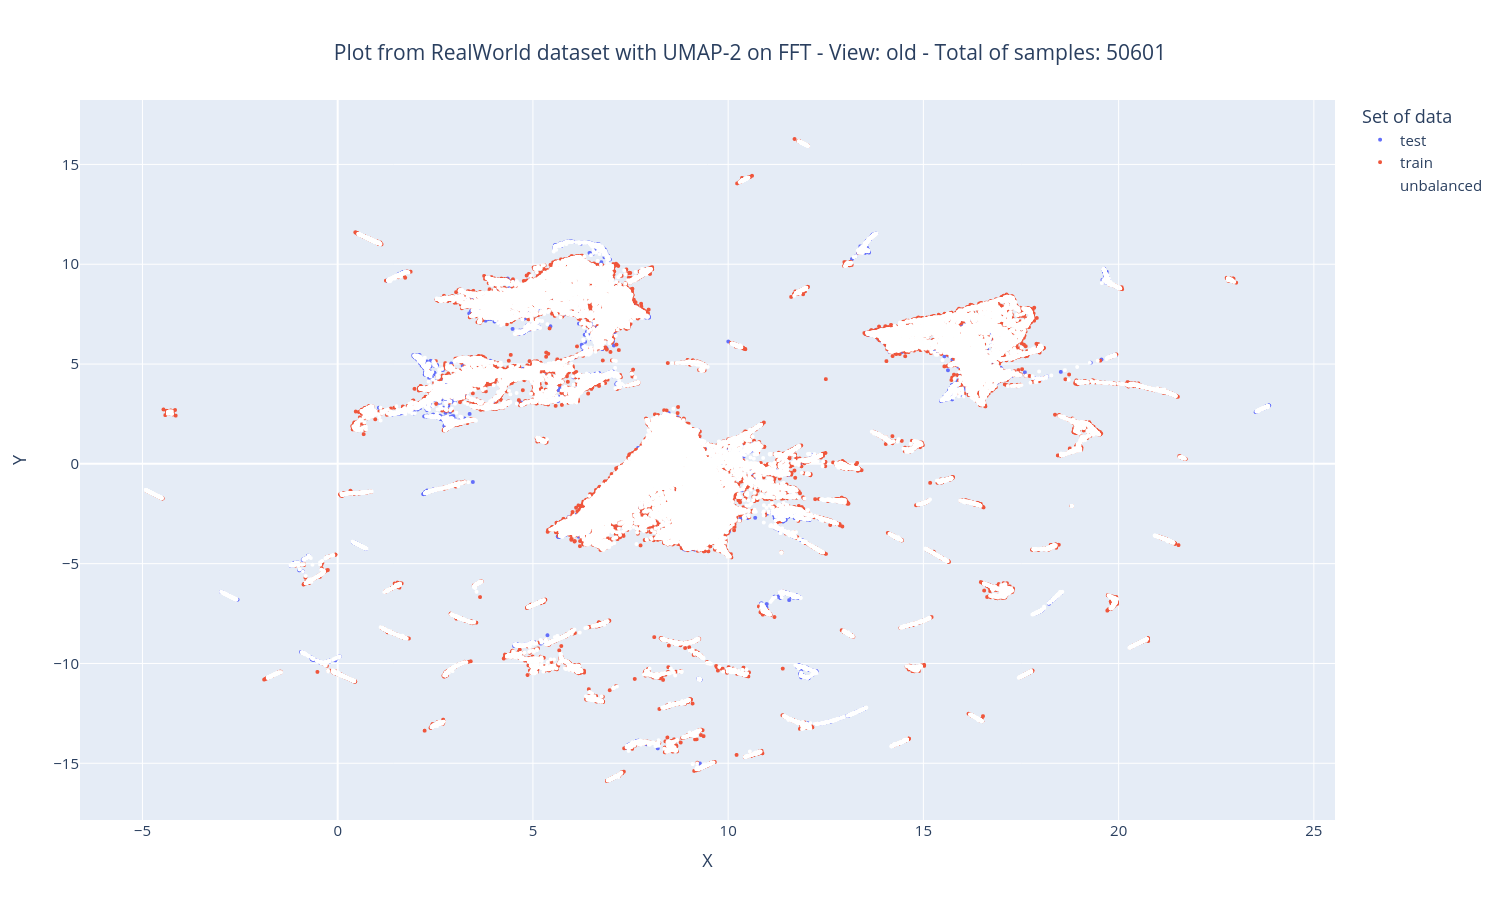

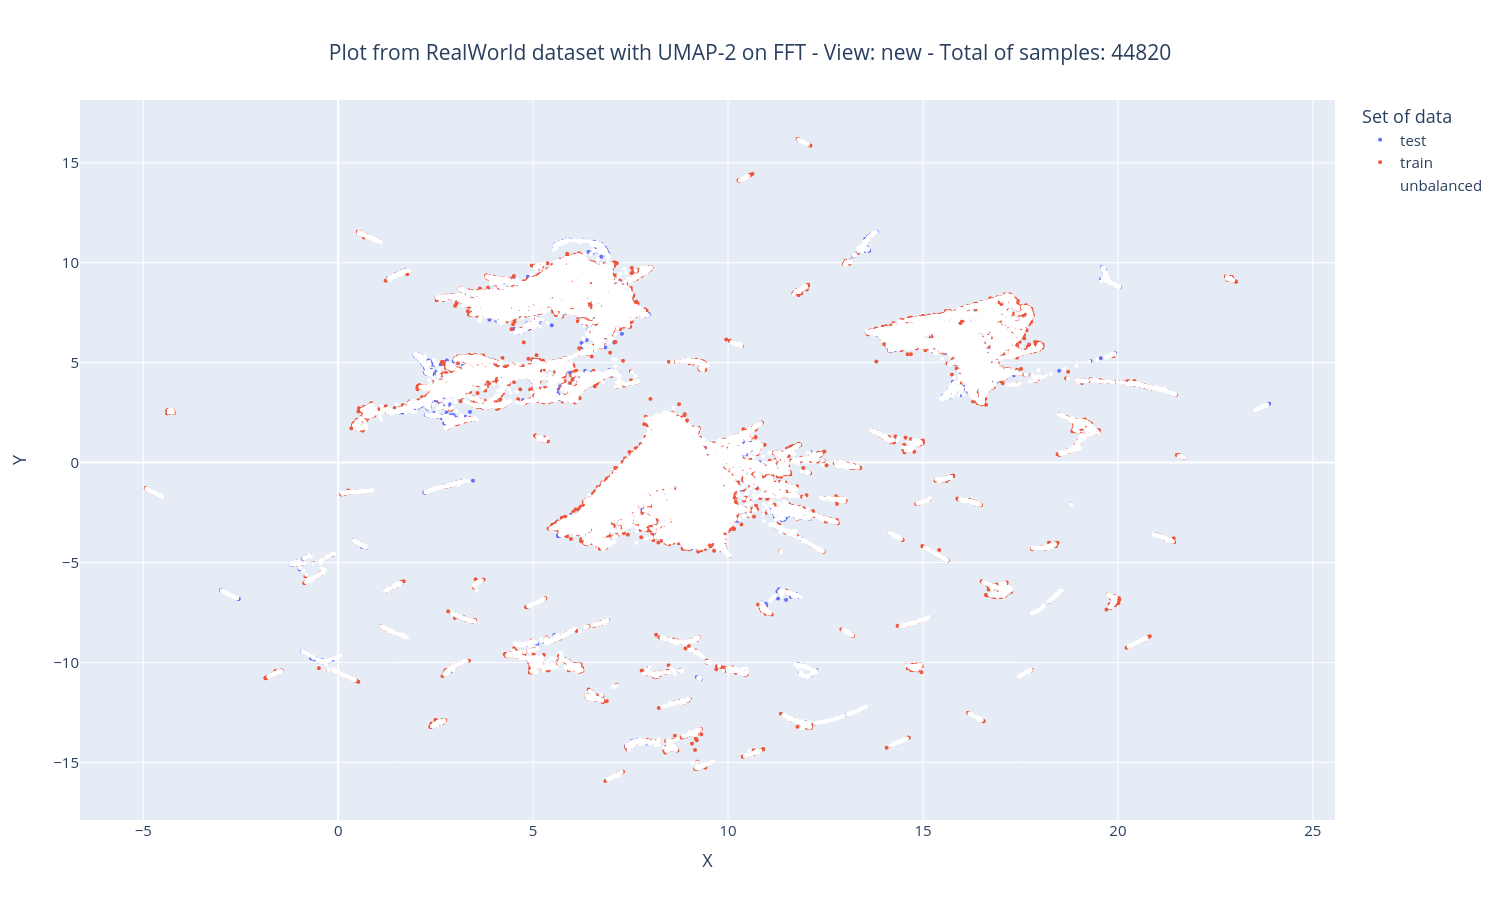

In [12]:
# Carregando os dados em pkl

with open("umap_data.pkl", "rb") as f:
    umap_data = pickle.load(f)

for dataset in datasets:
    for view in ["old", "new"]:
        data = umap_data[view][dataset]
        title = f"Plot from {dataset} dataset with UMAP-2 on FFT - View: {view} - Total of samples: {len(data) // 2}"
        generate_chart(data, title, labels_activity)